# Bank Transaction Analysis

Hello, my name is Widya.
In this project, We will explore bank transaction data to uncover spending patterns, transaction types, customer demographics, and detect potential anomalies using Python.

## Importing Data

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/widyacatur/personalproject/refs/heads/main/WIP%20-%20Bank%20Transactions%20Analysis/bank_transactions_data_2.csv"
df = pd.read_csv(url)

In [3]:
print(df)

     TransactionID AccountID  TransactionAmount      TransactionDate  \
0         TX000001   AC00128              14.09  2023-04-11 16:29:14   
1         TX000002   AC00455             376.24  2023-06-27 16:44:19   
2         TX000003   AC00019             126.29  2023-07-10 18:16:08   
3         TX000004   AC00070             184.50  2023-05-05 16:32:11   
4         TX000005   AC00411              13.45  2023-10-16 17:51:24   
...            ...       ...                ...                  ...   
2507      TX002508   AC00297             856.21  2023-04-26 17:09:36   
2508      TX002509   AC00322             251.54  2023-03-22 17:36:48   
2509      TX002510   AC00095              28.63  2023-08-21 17:08:50   
2510      TX002511   AC00118             185.97  2023-02-24 16:24:46   
2511      TX002512   AC00009             243.08  2023-02-14 16:21:23   

     TransactionType          Location DeviceID      IP Address MerchantID  \
0              Debit         San Diego  D000380  162.198.

Summarytools library will be used for quick overlook into the dataframe.

In [4]:
pip install SummaryTools

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: C:\Users\Widya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,TransactionID[object],1. TX0025122. TX0000013. TX0000024. TX0000035. TX0000046. TX0000057. TX0000068. TX0000079. TX00000810. TX00000911. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)2,502 (99.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8ekN5oAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADQklEQVR4nO3cwWkbYRRG0TdCJPZGQghUQtKDisg2HauINGGkReJ44yyCS8gdmJxTwb+48BDMp+X9/X2gsFv7Afw/xEZGbGTERkZsZMRGRmxkxEZGbGTERma3LMvXZVme1n4I27ebmS8z83nth7B9zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkdnNzI+Z+b32Q9i+xb8YUXFGyYiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyIiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhklIzYyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhkls8zM88x8WvshbN7b/nw+fzscDqe1X8K2PR6Pl/3hcDhdr9dfx+Pxde0HsU33+/3pdrud9jMzx+Px9XK5/Fz7UWzasx8IZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZPYzfz8BWfshbNdHX8v5fP7u40n+tcfj8eKzcCpv1lVk/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiPzB0WpV2yec8bJAAAAAElFTkSuQmCC"">",0(0.0%)
2,AccountID[object],1. AC004602. AC003633. AC003624. AC002025. AC004806. AC003047. AC004568. AC002579. AC0022510. AC0021911. other,"12 (0.5%)12 (0.5%)12 (0.5%)12 (0.5%)11 (0.4%)11 (0.4%)11 (0.4%)11 (0.4%)11 (0.4%)10 (0.4%)2,399 (95.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8ekN5oAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfUlEQVR4nO3cwWoTUQCG0ZsSit1MCIE8TB6iD+tD5G1CyCxs6SYujCtNFaxfMJ6zEtzM4mMyXu7v4nw+Dyg83PoB+H+IjYzYyIiNjNjIiI2M2MiIjYzYyCzGGE9jjHE+n19u/CzcueVms3keY4zFYvFZcPxND9M0radpWo8xHm/9MNw332xkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmY5z/Px8ue3mz4Jd88GgczCf5lFxZuNjHUVGesqMo4+yIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQcS2cjMELGW82MgYvZAxeyDj6ICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxrVwMgYvZHyzkfEzSsa6iox1FRnfbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryLgWTsa6iow3GxmDFzIGL2QcfZARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IeNaOBmDFzLebGQMXsgYvJBx9EFGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryNggkLGuIuPNRsa6iox1FRlHH2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyLgWTsbghYw3GxmDFzIGL2QcfZARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IeNaOBmDFzK+2cj4GSVjXUXGuoqMbzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWRcCydjXUXGm42MwQsZgxcyjj7IiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJBxLZyMwQuZ7282V8L5KG/XfiWXm83m+bJBgD82z/Px2nhqOU3TerfbvaxWq9dbPBz343Q6fdrv9+vD4fA4xvgxtjHGWK1Wr9vt9kv+dNyjp2t/4ZyNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzHKMb1dDbv0g/Pt+1dFynufjfr9fj3euhsDvugyofjqeci2cj3b1WrjBCxn/QCAjNjJiIyM2MmIjIzYyYiMjNjJiI/MVlHUQJ0ddGaUAAAAASUVORK5CYII="">",0(0.0%)
3,TransactionAmount[float64],Mean (sd) : 297.6 (291.9)min < med < max:0.3 < 211.1 < 1919.1IQR (CV) : 332.6 (1.0),"2,455 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8ekN5oAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACZElEQVR4nO3cMW/aQBiH8fcKQQZaAyKCzStbB0aWfoN+2K4dI8HMt0BIVgDhhoCQu5SqUtIAd6H1//T8ZnxmeGR0yPe6siwNqLoP//sLAJeon/uAc65pZg3P9fdlWT55Xgv89maozrlmv9//mqZpz2fxzWbz6Jz7RqwIde6J2kjTtDeZTJ46nc7umoXX63UynU57eZ43zIxQEeTsT7+ZWafT2Q0Ggx8e6zc9rgFeYDMFCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCY

From the summary above, I will create visualizations to help stakeholders quickly grasp the overall picture of the data.

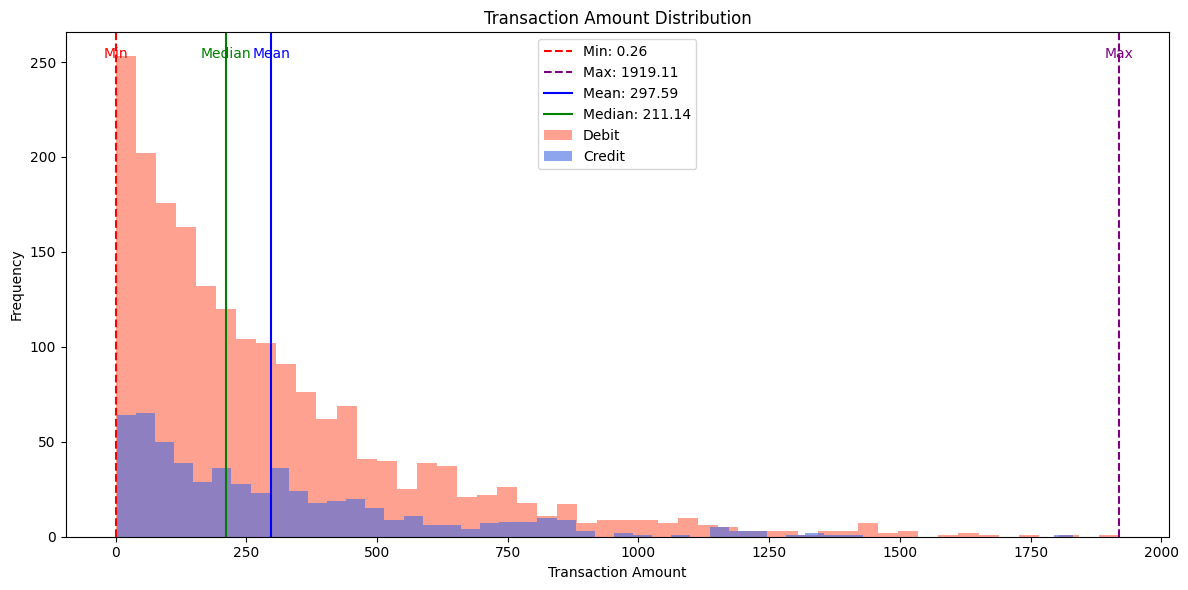

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate Debit and Credit transactions
debit = df[df['TransactionType'] == 'Debit']['TransactionAmount']
credit = df[df['TransactionType'] == 'Credit']['TransactionAmount']

# Summary statistics
min_val = df['TransactionAmount'].min()
max_val = df['TransactionAmount'].max()
mean_val = df['TransactionAmount'].mean()
median_val = df['TransactionAmount'].median()

# Plot
plt.figure(figsize=(12, 6))

# Plot Debit histogram
sns.histplot(debit, bins=50, color='tomato', label='Debit', alpha=0.6, edgecolor=None)

# Plot Credit histogram
sns.histplot(credit, bins=50, color='royalblue', label='Credit', alpha=0.6, edgecolor=None)

# Add reference lines
plt.axvline(min_val, color='red', linestyle='--', label=f'Min: {min_val:.2f}')
plt.axvline(max_val, color='purple', linestyle='--', label=f'Max: {max_val:.2f}')
plt.axvline(mean_val, color='blue', linestyle='-', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')

# Optional: Add text labels above lines
plt.text(min_val, plt.ylim()[1]*0.95, 'Min', color='red', ha='center')
plt.text(max_val, plt.ylim()[1]*0.95, 'Max', color='purple', ha='center')
plt.text(mean_val, plt.ylim()[1]*0.95, 'Mean', color='blue', ha='center')
plt.text(median_val, plt.ylim()[1]*0.95, 'Median', color='green', ha='center')

# Final touches
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


We found that on average, customers spend around USD 298 per transaction, with amounts ranging from USD 0.30 to USD 1,919. Debit transactions appear more frequent and higher in value compared to credits. Fort Worth stands out as the city with the most transactions, totaling 70, while Branch is the most commonly used channel, recording 868 transactions.

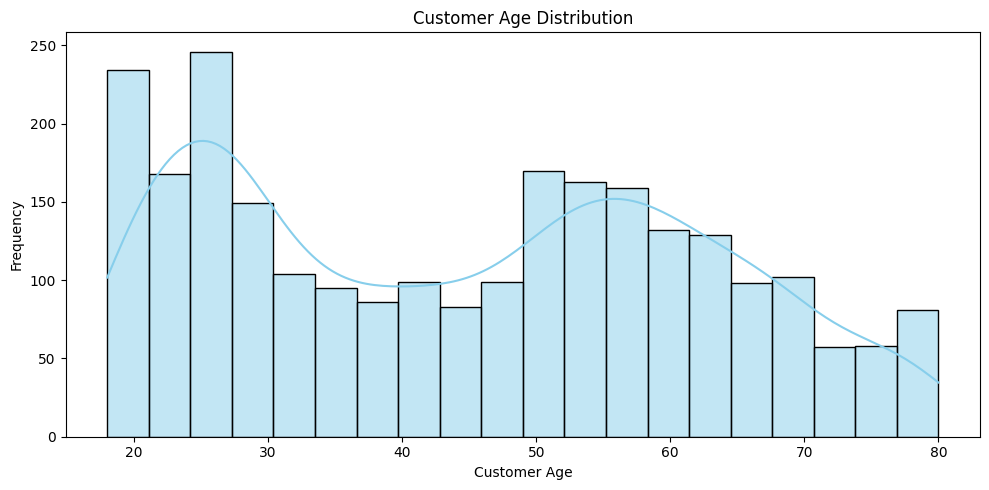

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size
plt.figure(figsize=(10, 5))

# Plot the histogram
sns.histplot(df['CustomerAge'], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.title('Customer Age Distribution')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



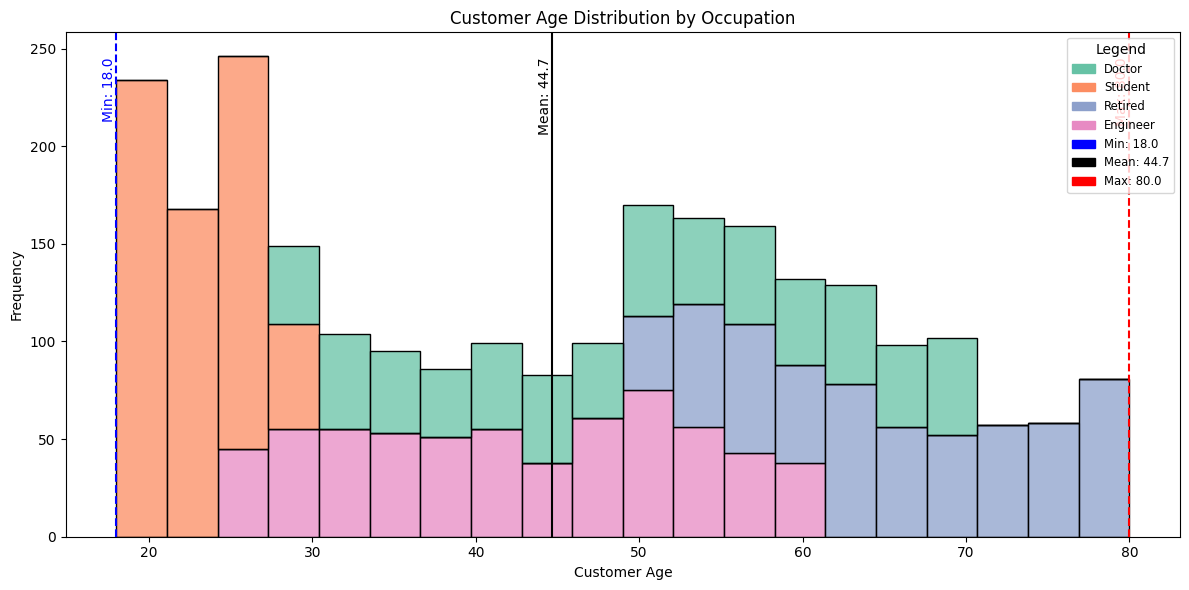

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Clean and prepare
df_clean = df.dropna(subset=['CustomerOccupation'])
occupations = df_clean['CustomerOccupation'].unique()
palette = sns.color_palette('Set2', n_colors=len(occupations))
occupation_color_map = dict(zip(occupations, palette))

# Calculate stats
min_age = df_clean['CustomerAge'].min()
max_age = df_clean['CustomerAge'].max()
mean_age = df_clean['CustomerAge'].mean()

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_clean,
    x='CustomerAge',
    hue='CustomerOccupation',
    bins=20,
    multiple='stack',
    palette=occupation_color_map,
    edgecolor='black'
)

# Add vertical lines
plt.axvline(min_age, color='blue', linestyle='--', linewidth=1.5)
plt.axvline(mean_age, color='black', linestyle='-', linewidth=1.5)
plt.axvline(max_age, color='red', linestyle='--', linewidth=1.5)

# Annotate each line with value
plt.text(min_age, plt.ylim()[1]*0.95, f'Min: {min_age:.1f}', color='blue', rotation=90, va='top', ha='right')
plt.text(mean_age, plt.ylim()[1]*0.95, f'Mean: {mean_age:.1f}', color='black', rotation=90, va='top', ha='right')
plt.text(max_age, plt.ylim()[1]*0.95, f'Max: {max_age:.1f}', color='red', rotation=90, va='top', ha='right')

# Title & axis labels
plt.title('Customer Age Distribution by Occupation')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')

# Create legend
occupation_legend = [Patch(color=color, label=occupation) for occupation, color in occupation_color_map.items()]
stat_legend = [
    Patch(color='blue', label=f'Min: {min_age:.1f}'),
    Patch(color='black', label=f'Mean: {mean_age:.1f}'),
    Patch(color='red', label=f'Max: {max_age:.1f}')
]

# Combine legends
plt.legend(
    handles=occupation_legend + stat_legend,
    title='Legend',
    title_fontsize='medium',
    fontsize='small',
    loc='upper right'
)

plt.tight_layout()
plt.show()


Customer ages range from 18 to 80 years old, with an average age of 44. 

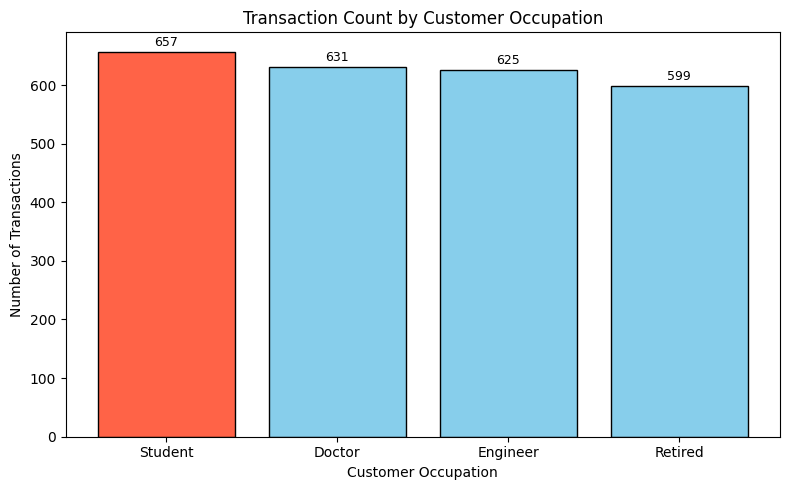

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count transactions by occupation
occupation_counts = df['CustomerOccupation'].value_counts().sort_values(ascending=False)

# Define colors: highlight "Student"
colors = ['tomato' if occ == 'Student' else 'skyblue' for occ in occupation_counts.index]

plt.figure(figsize=(8, 5))
bars = plt.bar(occupation_counts.index, occupation_counts.values, color=colors, edgecolor='black')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

# Titles and labels
plt.title('Transaction Count by Customer Occupation')
plt.xlabel('Customer Occupation')
plt.ylabel('Number of Transactions')


plt.tight_layout()
plt.show()


Notably, transactions are dominated by Students, accounting for 657 transactions, followed closely by Doctors and Engineers with 631 and 625 transactions, respectively.

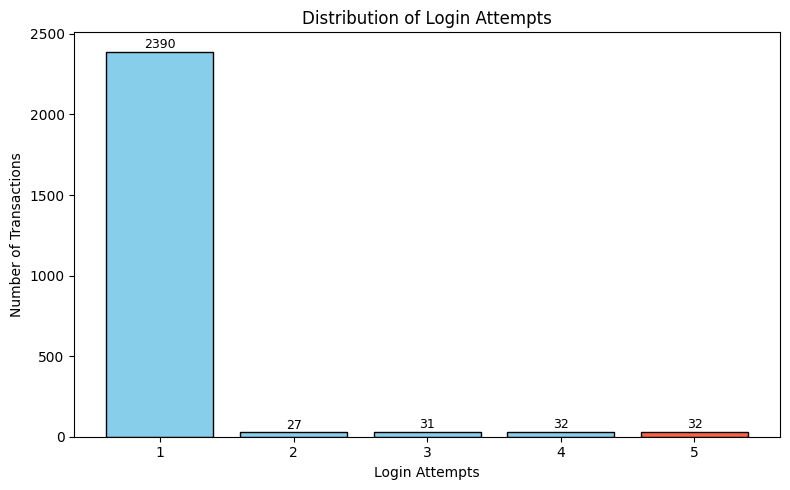

In [15]:
import matplotlib.pyplot as plt

# Count frequency of login attempts
login_counts = df['LoginAttempts'].value_counts().sort_index()

# Define bar colors: default blue, red for 5 login attempts
colors = ['tomato' if attempt == 5 else 'skyblue' for attempt in login_counts.index]

plt.figure(figsize=(8, 5))
bars = plt.bar(login_counts.index, login_counts.values, color=colors, edgecolor='black')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{int(height)}', 
             ha='center', va='bottom', fontsize=9)

# Titles and labels
plt.title('Distribution of Login Attempts')
plt.xlabel('Login Attempts')
plt.ylabel('Number of Transactions')


plt.tight_layout()
plt.show()


Most customers required only one login attempt, but five login attempts were also observed in 32 out of 2,512 transactions, making them unusual but not rare.

In [10]:
print(df.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

In [11]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

From the dataframe info we see that the TransactionDate and PreviousTransactionDate is not in the right data type, so we'll do some feature engineering.

In [12]:
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002512,AC00460,NaN,2023-02-14 16:21:23,Debit,Fort Worth,D000663,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


From the summary above, we can see that the dataset contains various columns such as 'Transaction ID', 'Date', 'Amount', 'Type', and 'Description'. The 'Amount' column is of particular interest for financial analysis, while the 'Type' column indicates whether the transaction is a credit or debit. The 'Date' column will be useful for time-based analysis.

On average, customer spends about 298 dollars per transactions, ranging from 0.3 to 1919 dollars, with Debit having more of an upper hand compared to Credit. Fort Worth become the city in which most transaction recorded, with 70 transactions, and Branch seems to be the most favorable Channel with 868 transactions recorded.

Our customer age range between 18 to 80, with the average age is 44 years old. One other thing to notice that the transactions seems to be dominated by Student with 657 transaction, with Doctor and Engineer come close second and third with 631 and 625 transactions respectively.

Most customers needed only 1 login attempts, but 5 login attempts is not uncommon for it occupied 32 out of 2512 transactions.

Text(0.5, 1.0, 'Distribution of Transaction Amounts')

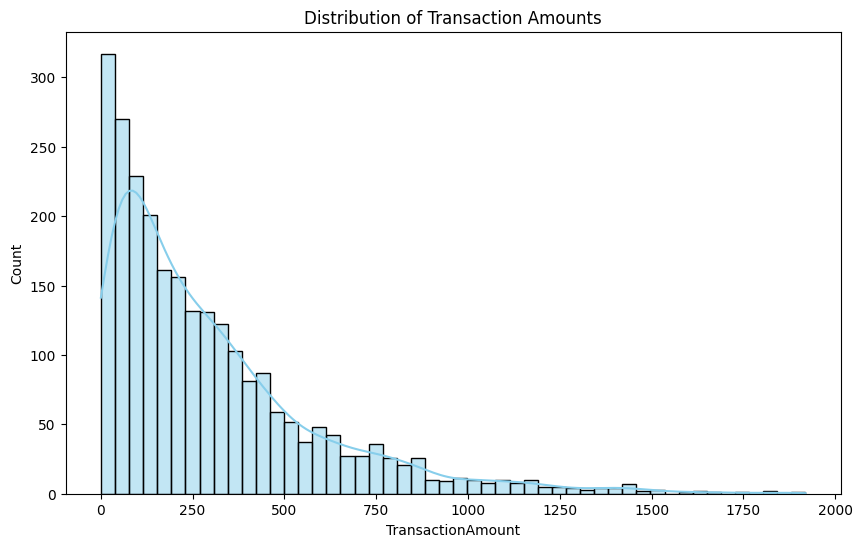

In [13]:
# Visualize the distribution of TransactionAmount

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['TransactionAmount'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Transaction Amounts')

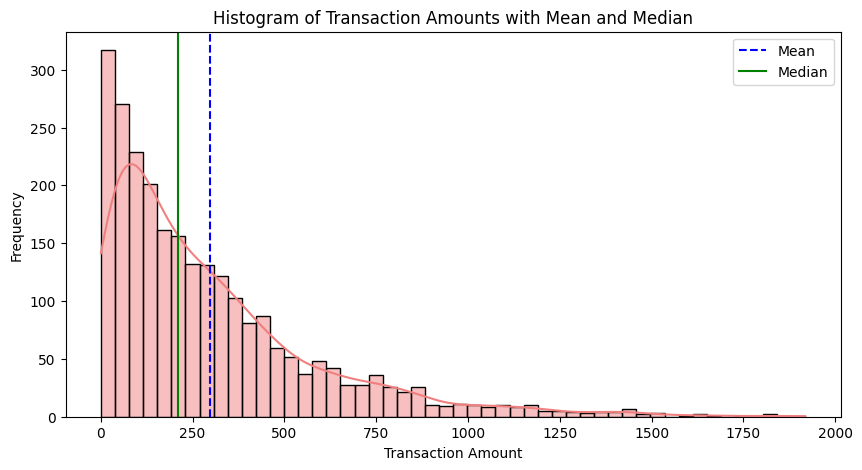

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['TransactionAmount'], bins=50, kde=True, color='lightcoral')

# Add mean and median lines
plt.axvline(df['TransactionAmount'].mean(), color='blue', linestyle='--', label='Mean')
plt.axvline(df['TransactionAmount'].median(), color='green', linestyle='-', label='Median')

plt.title('Histogram of Transaction Amounts with Mean and Median')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()
